In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-top-50-bestselling-books-2009-2022/bestsellers_with_categories_2022_03_27.csv


In [2]:
#Loading the dataset
data=pd.read_csv("/kaggle/input/amazon-top-50-bestselling-books-2009-2022/bestsellers_with_categories_2022_03_27.csv")

In [3]:
data.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,"Act Like a Lady, Think Like a Man: What Men Re...",Steve Harvey,4.6,5013,17,2009,Non Fiction
1,Arguing with Idiots: How to Stop Small Minds a...,Glenn Beck,4.6,798,5,2009,Non Fiction
2,"Breaking Dawn (The Twilight Saga, Book 4)",Stephenie Meyer,4.6,9769,13,2009,Fiction
3,Crazy Love: Overwhelmed by a Relentless God,Francis Chan,4.7,1542,14,2009,Non Fiction
4,Dead And Gone: A Sookie Stackhouse Novel (Sook...,Charlaine Harris,4.6,1541,4,2009,Fiction


In [4]:
#Importing packages
import seaborn as sns
import matplotlib.pyplot as plt

# **Exploratory Data Analysis**

[Text(0.5, 1.0, 'User Rating by Genre from 2009-2022')]

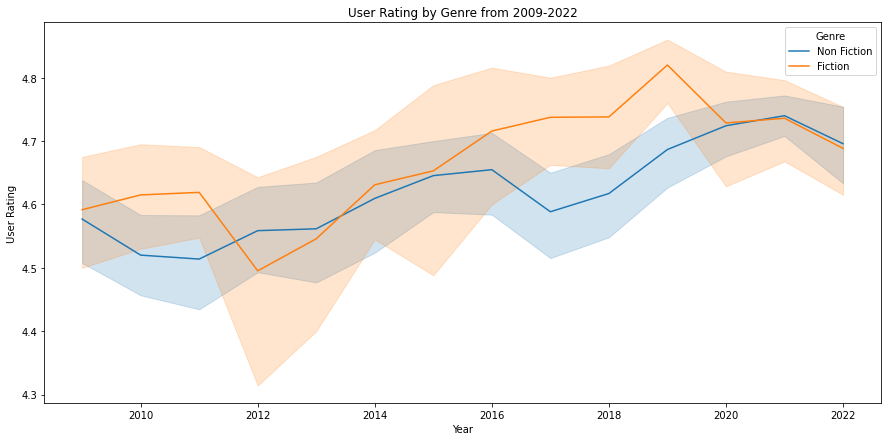

In [5]:
plt.figure(figsize=(15, 7))

sns.lineplot(x="Year", y="User Rating",
             hue="Genre",
             data=data).set(title='User Rating by Genre from 2009-2022')

There seems to be an increase in the number of user ratings for bestselling fiction and non-fiction books over the years. The year 2019 especially seems to have a high quantity of user ratings in the Fiction Genre. The Covid-19 pandemic could have insilled people to get back to reading books, and this could be the reason why the quantity of user ratings

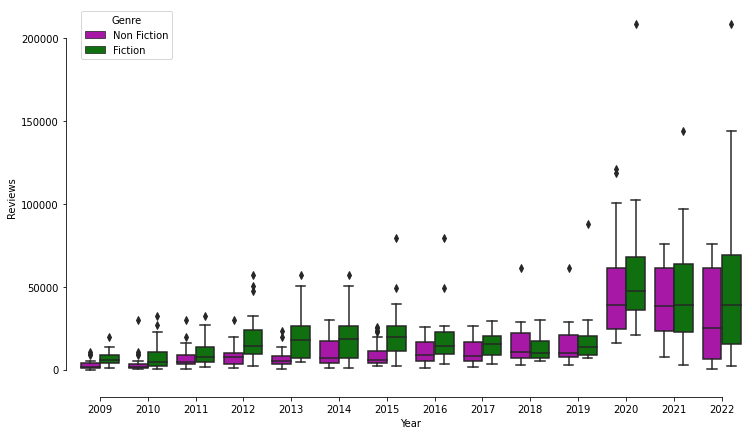

In [6]:
plt.figure(figsize=(12, 7))

sns.boxplot(x="Year", y="Reviews",
            hue="Genre", palette=["m", "g"],
            data=data)
sns.despine(offset=10, trim=True)

The volume of reviews increased to a great extent for both Fiction and Non-Fiction Genres from the year 2020. This truly shows that people got back to reading books during the pandemic. Strict isolation and work-from-home culture led people to have more free time in their hands, so it can be seen that the volume of reviews on Amazon increased suddenly from 2020.

Fiction seems to be the popular choice among Amazon book reviewers. However, it looks like Non-fiction suddenly gained popularity and is at a reasonable standing with Fiction from the year 2020. 

<AxesSubplot:xlabel='Year', ylabel='Price'>

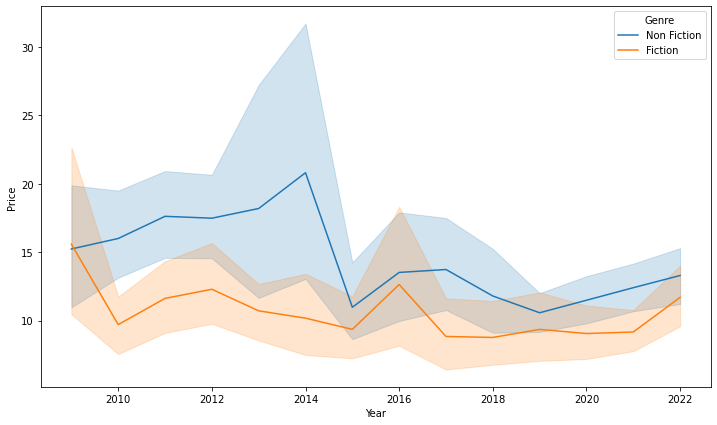

In [7]:
plt.figure(figsize=(12, 7))

sns.lineplot(x="Year", y="Price",
             hue="Genre",
             data=data)

Another reason for the sudden increase in the number of reviews and user ratings on Amazon could be attributed to the price of books. It looks like the prices of both fiction and non-fiction books (top-50) reduced significantly on Amazon's website. The reduction is prices of bestelling novels along with the effects of the covid-19 pandemic have caused more people to buy books and review them on Amazon

In [8]:
df=data.groupby(['Genre', 'Year']).size().reset_index(name='counts')

[Text(0.5, 1.0, 'Number of Fiction vs Non Fiction books in Amazons top-50 list from 2009-2022')]

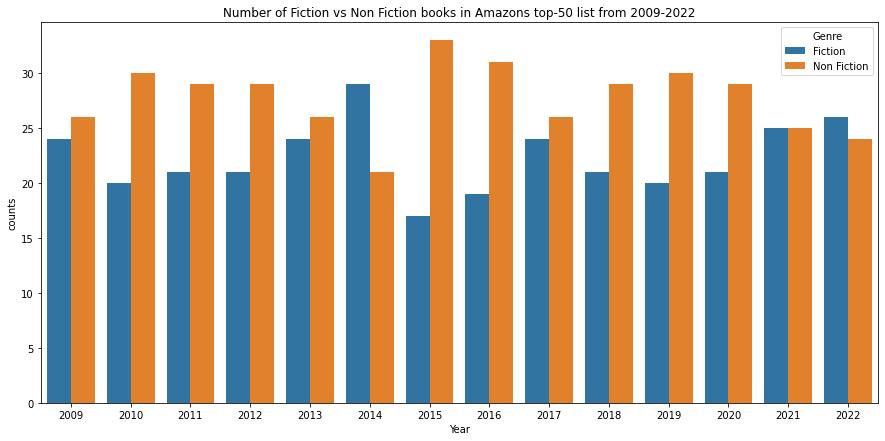

In [9]:
plt.figure(figsize=(15, 7))
sns.barplot(x='Year', y='counts', hue='Genre', data=df).set(title='Number of Fiction vs Non Fiction books in Amazons top-50 list from 2009-2022')

Even though the popularity of Fiction novels is greater than that of non-fiction, it looks like there are more non-fiction books which are part of Amazon's top-50 bestselling books most years.

<AxesSubplot:>

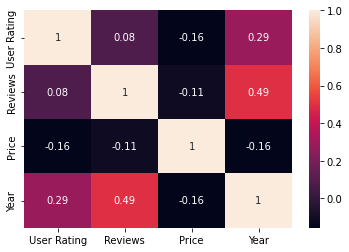

In [10]:
sns.heatmap(data.corr(), annot=True)

There seems to be a weak positive correlation (0.49) between Reviews and Year. This means that as each year passes by, the number of Reviews of the top 50 bestselling novels on Amazon increases. 

It is surprising to see that there is no correlation between Reviews and User Ratings. This could be because our dataset is only limited to the top-50 bestselling novels (which will only have high user ratings)

<AxesSubplot:xlabel='User Rating', ylabel='Reviews'>

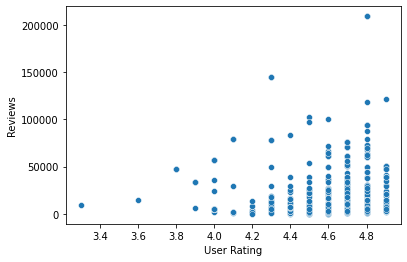

In [11]:
sns.scatterplot(x="User Rating", y="Reviews",data=data)

In [12]:
df1=data.groupby(['Author', 'Year']).mean().reset_index()

In [13]:
df1.head()

,Author,Year,User Rating,Reviews,Price
0,Abraham Verghese,2010,4.6,4866.0,11.0
1,Abraham Verghese,2011,4.6,4866.0,11.0
2,Adam Gasiewski,2017,4.4,3113.0,6.0
3,Adam Mansbach,2011,4.8,9568.0,9.0
4,Adam Silvera,2021,4.7,22602.0,8.0
